In [1]:
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
from scipy.signal import savgol_filter

In [2]:
muRange=np.arange(51,55,0.02)
n = 20
N = 10^4
mu0 = 53.0
sigma = 1.2
powerT, powerU = [], []

In [3]:
for muActual in muRange:
    rejectT,rejectU = 0,0
    dist = np.random.normal(muActual,sigma,1000)
    np.random.seed(1)
    for it in range(N):
        data = np.random.choice(dist,n)
        xBar, stdDev = np.mean(data), np.std(data)
        tStatT = (xBar - mu0)/(stdDev/np.sqrt(n))
        pValT = st.t.sf(np.abs(tStatT), n-1)*2
        
        xPositive = sum( i > mu0 for i in data )
        uStat = max(xPositive, n-xPositive)
        pValSign = st.binom.pmf(uStat,n,0.5)*2
        if pValT < 0.05:
            rejectT  = rejectT + 1 
        if pValSign <0.05:
            rejectU  = rejectU + 1 
    powerT.append(rejectT/N)
    powerU.append(rejectU/N)

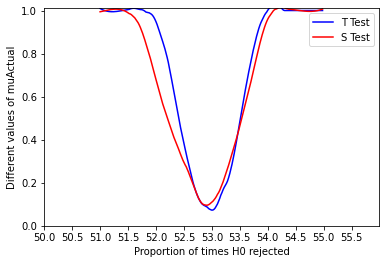

In [4]:
smoothT = savgol_filter(powerT,53,3)  
smoothU = savgol_filter(powerU,53,3)
plt.plot(muRange,smoothT,color = 'blue',ls = "-")
plt.plot(muRange,smoothU,color = 'red',ls = "-")
plt.xlim(50.99,55.99)
plt.ylim(0,1.01)
plt.xticks(np.arange(50,56,0.5))
plt.xlabel('Proportion of times H0 rejected')
plt.ylabel('Different values of muActual')
plt.legend(["T Test","S Test"],loc='best', frameon=True)
plt.show()